In [1]:
import os
import pandas as pd
import glob
import datetime as dt
import indicators as ind
import visualisation as vis
import utilities as ut
import multiprocessing
from dateutil.relativedelta import relativedelta as rtd

c:\Users\jaysa\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\jaysa\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\Users\jaysa\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
path = "daily"
tocken = 'btc-usd'
files = glob.glob(f"{path}/{tocken.upper()}/*.ftr")

In [3]:
df = pd.read_feather(files[0]).set_index('Date')
df.tail()

Open          High           Low         Close  \
Date                                                                 
2022-08-21  21160.392578  21668.845703  21103.197266  21534.121094   
2022-08-22  21531.462891  21531.462891  20939.183594  21398.908203   
2022-08-23  21401.044922  21646.203125  20955.138672  21528.087891   
2022-08-24  21526.455078  21783.076172  21195.005859  21395.019531   
2022-08-25  21377.316406  21783.738281  21374.896484  21615.074219   

               Adj Close       Volume  
Date                                   
2022-08-21  21534.121094  23102307723  
2022-08-22  21398.908203  31666498758  
2022-08-23  21528.087891  31878280659  
2022-08-24  21395.019531  31962253368  
2022-08-25  21615.074219  32164878336

In [4]:
from datetime import date


vis.oldplotTockenData(df= df.reset_index(),
                   date_col='Date',
                   sma=True,
                   title=tocken,
                   )

c:\Users\jaysa\AppData\Local\Programs\Python\Python37\lib\site-packages\plotly\graph_objs\_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [5]:
qf= vis.plotTockenData(df,title = f"{tocken.upper()}-{path}", name =  tocken)
qf.add_bollinger_bands(14)
qf.add_rsi(14)
qf.add_volume()
qf.add_support('2022-02-24')
qf.iplot()

# Test Multipool

In [2]:
import glob
import pandas as pd
from multiprocessing import Pool
path = "E:/Workplace/Coding/demodata"

c:\Users\jaysa\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\jaysa\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\Users\jaysa\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [10]:
files = glob.glob(f"{path}/*.csv")
new_df = pd.DataFrame(columns = ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Total Bill', 'Address', 'City', 'State', 'Zip'])

def load_clean_data(f):
    # Load Data
    global new_df
    df = pd.read_csv(f,
                    parse_dates = ['Order Date'],
                    )
    # Clean Data
    df = df.dropna()
    df = df[~(df['Order ID']=='Order ID')]
    df = df.reset_index(drop=True)
    df['Order ID'] = df['Order ID'].astype('int')
    df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
    df['Price Each'] = df['Price Each'].astype('float')
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df['Total Bill'] = df['Quantity Ordered'] * df['Price Each']
    df['Address'] = df['Purchase Address'].map(lambda x:x.split(",")[0])
    df['City'] = df['Purchase Address'].map(lambda x:x.split(",")[1])
    df['State'] = df['Purchase Address'].map(lambda x:x.split(",")[2].split(" ")[1])
    df['Zip'] = df['Purchase Address'].map(lambda x:x.split(",")[2].split(" ")[2])
    df = df.drop('Purchase Address', axis=1)
    new_df = pd.concat([new_df,df])
    return new_df

# with Pool(processes=len(files)) as p:
#     p.map(load_clean_data, files)
#     print("process done")

# new_df

for file in files:
    load_clean_data(file)
new_df = new_df.reset_index(drop=True).convert_dtypes()
new_df

Order ID                     Product  Quantity Ordered  Price Each  \
0         176558        USB-C Charging Cable                 2       11.95   
1         176559  Bose SoundSport Headphones                 1       99.99   
2         176560                Google Phone                 1       600.0   
3         176560            Wired Headphones                 1       11.99   
4         176561            Wired Headphones                 1       11.99   
...          ...                         ...               ...         ...   
185945    259353      AAA Batteries (4-pack)                 3        2.99   
185946    259354                      iPhone                 1       700.0   
185947    259355                      iPhone                 1       700.0   
185948    259356      34in Ultrawide Monitor                 1      379.99   
185949    259357        USB-C Charging Cable                 1       11.95   

                Order Date  Total Bill          Address            City State  \
0      2019-04-19 08:46:00        23.9       917 1st St          Dallas    TX   
1      2019-04-07 22:30:00       99.99  682 Chestnut St          Boston    MA   
2      2019-04-12 14:38:00       600.0    669 Spruce St     Los Angeles    CA   
3      2019-04-12 14:38:00       11.99    669 Spruce St     Los Angeles    CA   
4      2019-04-30 09:27:00       11.99       333 8th St     Los Angeles    CA   
...                    ...         ...              ...             ...   ...   
185945 2019-09-17 20:56:00        8.97  840 Highland St     Los Angeles    CA   
185946 2019-09-01 16:00:00       700.0   216 Dogwood St   San Francisco    CA   
185947 2019-09-23 07:39:00       700.0      220 12th St   San Francisco    CA   
185948 2019-09-19 17:30:00      379.99    511 Forest St   San Francisco    CA   
185949 2019-09-30 00:18:00       11.95    250 Meadow St   San Francisco    CA   

          Zip  
0       75001  
1       02215  
2       90001  
3       90001  
4       90001  
...       ...  
185945  90001  
185946  94016  
185947  94016  
185948  94016  
185949  94016  

[185950 rows x 10 columns]

<AxesSubplot:xlabel='City'>

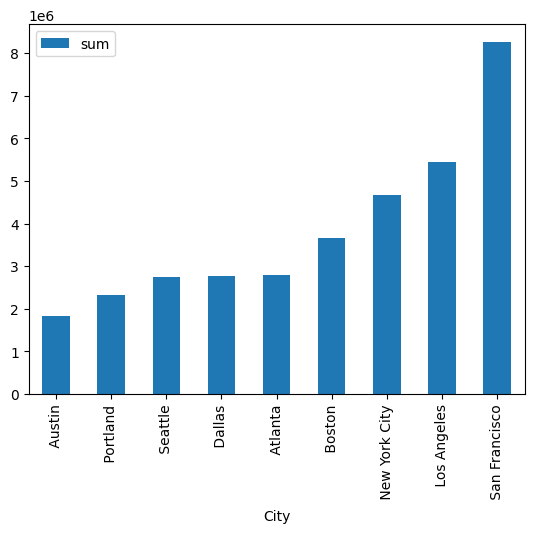

In [22]:
new_df.groupby('City')['Total Bill'].aggregate(['sum']).sort_values('sum').plot(kind='bar')

In [1]:

from forecast_model import forecast_crypto
import datetime as dt
import yfinance as yf
s_date = dt.date.today() - dt.timedelta(days=120)
e_date = dt.date.today()
df_today = yf.download('HBAR-USD',start_date=s_date, end_date=e_date ,interval='1d')
col_list = ['High','Low','Open','Close']
df_forecast_open = forecast_crypto(df_today, days = 14, cols = col_list)
df_forecast_open

c:\Users\jaysa\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\jaysa\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\Users\jaysa\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


[*********************100%***********************]  1 of 1 completed


High      Open     Close       Low
Date                                              
2022-10-13  0.063231  0.060591  0.058504  0.053199
2022-10-14  0.062552  0.059854  0.057809  0.052684
2022-10-15  0.062254  0.059527  0.057683  0.052431
2022-10-16  0.062110  0.059367  0.057857  0.052308
2022-10-17  0.061978  0.059340  0.057947  0.052251
2022-10-18  0.061959  0.059493  0.058134  0.052385
2022-10-19  0.062348  0.060026  0.058842  0.052671
2022-10-20  0.062196  0.059970  0.058795  0.052614
2022-10-21  0.062084  0.059959  0.058770  0.052642
2022-10-22  0.062098  0.060065  0.058708  0.052582
2022-10-23  0.063730  0.061875  0.060562  0.053808
2022-10-24  0.069185  0.067252  0.065904  0.057866
2022-10-25  0.073701  0.072124  0.069763  0.061167
2022-10-26  0.074530  0.073600  0.069663  0.062076

In [11]:
res_df = df_forecast_open
import plotly.graph_objects as go

fig.show()

In [21]:
import streamlit
streamlit.__version__

'1.12.2'